In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [6]:
old_csv = """
bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,32,32,635064,0,0,11440
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,32,32,2533500,0,0,45702
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,3061
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,64,64,635064,0,0,12045
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,896
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,128,128,159048,0,0,3347
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,311
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,256,256,40044,0,0,1151
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,172
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,592
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,0,0,191
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,1024,1024,2592,0,0,455
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,0,0,259
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,2048,2048,648,0,0,599
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,0,0,223
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,4096,4096,180,0,0,743
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,9847
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,3894
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,1840
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1328
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,0,0,1414
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,0,0,3408
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,0,0,4094
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,27,21,132124
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,17,16,55378
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,16,16,20645
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,22,19,15481
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,23,17,17867
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,20,16,127865
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,21,17,122803
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,27,22,118234
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,29,19,117372
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,16,66265
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,24,18,42524
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,27,20,43178
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,20,17,47897
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,25,16,71091
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,22,18,31768
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,18,17,27335
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,24,17,30815
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,16,71963
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,17,17,33051
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,24,21,22662
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,25,17,23855
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,25,16,69604
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,17,16,37942
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,25,19,22040
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,19,17,19815
"""

old = pd.read_csv(StringIO(old_csv))
old['name'] = 'old'
old

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,32,32,635064,0,0,11440,old
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,32,32,2533500,0,0,45702,old
2,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,3061,old
3,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,64,64,635064,0,0,12045,old
4,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,896,old
5,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,128,128,159048,0,0,3347,old
6,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,311,old
7,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,256,256,40044,0,0,1151,old
8,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,172,old
9,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,592,old


In [7]:
new_csv = """
bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,32,32,635064,0,0,5522
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,32,32,2533500,0,0,16365
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,1554
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,64,64,635064,0,0,6560
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,1160
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,128,128,159048,0,0,4120
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,984
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,256,256,40044,0,0,3967
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,931
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,3696
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,0,0,938
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,1024,1024,2592,0,0,3815
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,0,0,998
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,2048,2048,648,0,0,4663
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,0,0,1136
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,4096,4096,180,0,0,4449
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,7280
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,4779
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,3078
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,2308
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,0,0,2238
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,0,0,4072
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,0,0,4558
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,20,26,132277
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,17,16,52923
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,1024,1024,648,16,16,21099
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,2048,2048,180,20,16,15519
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,4096,4096,60,26,19,17425
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,25,16,125387
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,16,16,115104
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,24,17,117184
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,22,19,117648
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,66185
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,22,17,43195
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,18,17,42261
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,19,17,47997
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,16,74188
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,17,17,32886
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,23,19,28133
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,19,16,31643
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,23,16,74219
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,23,18,33121
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,22,19,23637
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,18,17,24859
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,16,71627
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,1024,1024,760,17,17,38978
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,2048,2048,200,20,17,23135
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,4096,4096,60,17,17,20587
"""

new = pd.read_csv(StringIO(new_csv))
new['name'] = 'new'
new

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,32,32,635064,0,0,5522,new
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,32,32,2533500,0,0,16365,new
2,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,64,64,159048,0,0,1554,new
3,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,64,64,635064,0,0,6560,new
4,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,128,128,40044,0,0,1160,new
5,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,128,128,159048,0,0,4120,new
6,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,256,256,10224,0,0,984,new
7,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,256,256,40044,0,0,3967,new
8,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,931,new
9,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,3696,new


In [8]:
csv_q1 = """
bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,821
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,3192
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,2488
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,19,17,52285
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,16,16,133596
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,68727
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,19,18,70702
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,17,68978
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,16,16,69633
"""

q1 = pd.read_csv(StringIO(csv_q1))
q1['name'] = 'q1'
q1

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,821,q1
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,3192,q1
2,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,2488,q1
3,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,19,17,52285,q1
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,16,16,133596,q1
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,68727,q1
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,19,18,70702,q1
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,17,68978,q1
8,projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,16,16,69633,q1


In [9]:
csv_q16 = """
bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms
gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,160
gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,418
expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1325
gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,22,17,53262
projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,134068
projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,23,26,65657
projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,26,17,69692
projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,20,17,70222
projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,17,68983
"""

q16 = pd.read_csv(StringIO(csv_q16))
q16['name'] = 'q16'
q16

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,160,q16
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,418,q16
2,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1325,q16
3,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,22,17,53262,q16
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,134068,q16
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,23,26,65657,q16
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,26,17,69692,q16
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,20,17,70222,q16
8,projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,17,68983,q16


In [10]:
new_q16 = pd.read_csv("q16.csv")
new_q16['name'] = 'new_q16'
new_q16

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,152,new_q16
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,396,new_q16
2,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1331,new_q16
3,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,31,16,59397,new_q16
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,29,23,128267,new_q16
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,17,64500,new_q16
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,21,17,77996,new_q16
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,16,70648,new_q16
8,projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,24,17,69562,new_q16


In [11]:
new_q8 = pd.read_csv("q8.csv")
new_q8['name'] = 'new_q8'
new_q8

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,179,new_q8
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,509,new_q8
2,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1464,new_q8
3,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,21,17,54825,new_q8
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,18,133583,new_q8
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,23,18,65101,new_q8
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,69310,new_q8
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,17,68701,new_q8
8,projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,26,24,68357,new_q8


In [12]:
new_q4 = pd.read_csv("q4.csv")
new_q4['name'] = 'new_q4'
new_q4

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
0,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,243,new_q4
1,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,857,new_q4
2,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1819,new_q4
3,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,28,19,59510,new_q4
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,24,16,131937,new_q4
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,17,16,66682,new_q4
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,16,73210,new_q4
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,18,16,72600,new_q4
8,projection 4326 -> 3857,32,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,26,17,69250,new_q4


In [13]:
df = pd.concat([old, new, q1, q16, new_q4, new_q8, new_q16])
df = df[df['tile_size_x'] == 512]
df

,bench_id,num_threads,chunk_byte_size,qrect_name,tile_size_x,tile_size_y,number_of_tiles,init_time_ms,query_time_ms,stream_time_ms,name
8,gdal_source,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,172,old
9,gdal_source,8,18446744073709551615,World in 72000x36000 pixels,512,512,10224,0,0,592,old
19,expression a+b,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,0,0,1328,old
24,gdal source + projection identity,8,18446744073709551615,World in 36000x18000 pixels,512,512,2592,17,16,55378,old
28,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,20,16,127865,old
...,...,...,...,...,...,...,...,...,...,...,...
4,projection 4326 -> 3857,1,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,29,23,128267,new_q16
5,projection 4326 -> 3857,4,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,17,64500,new_q16
6,projection 4326 -> 3857,8,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,21,17,77996,new_q16
7,projection 4326 -> 3857,16,18446744073709551615,World in EPSG:3857 ~ 40000 x 20000 px,512,512,2888,22,16,70648,new_q16


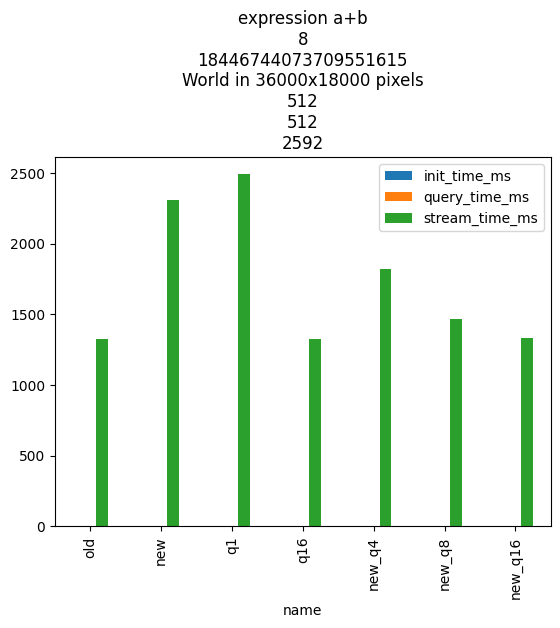

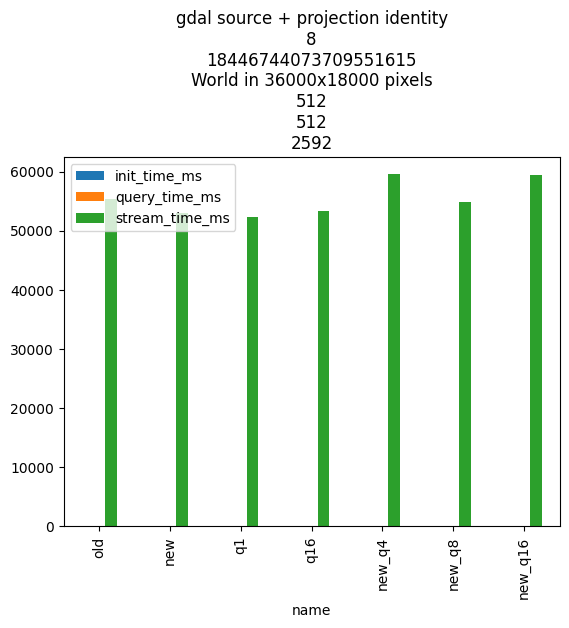

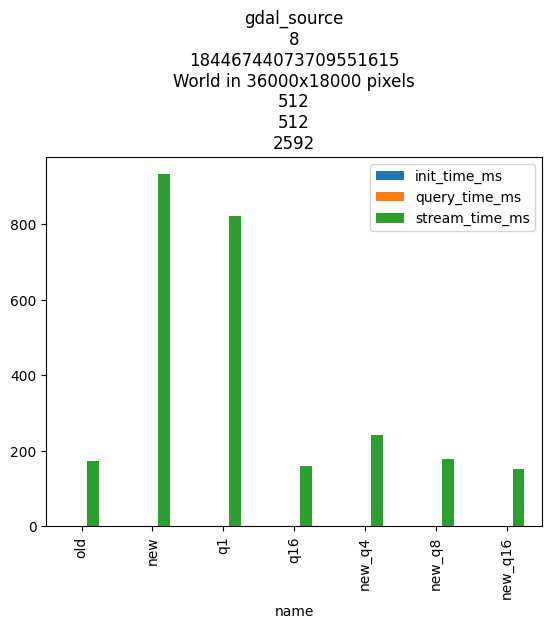

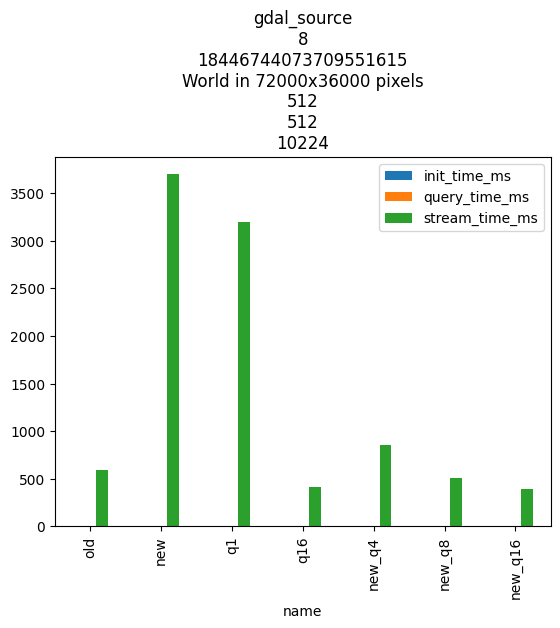

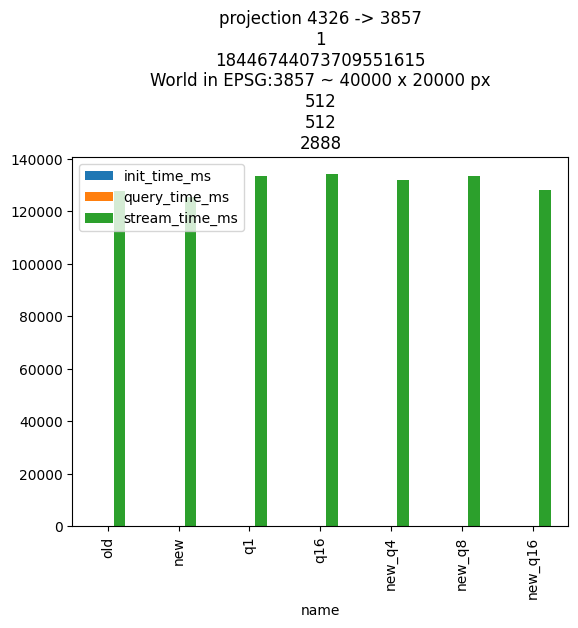

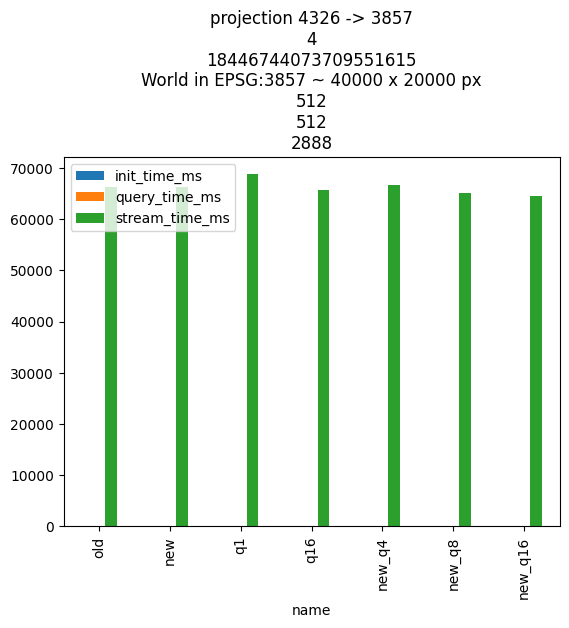

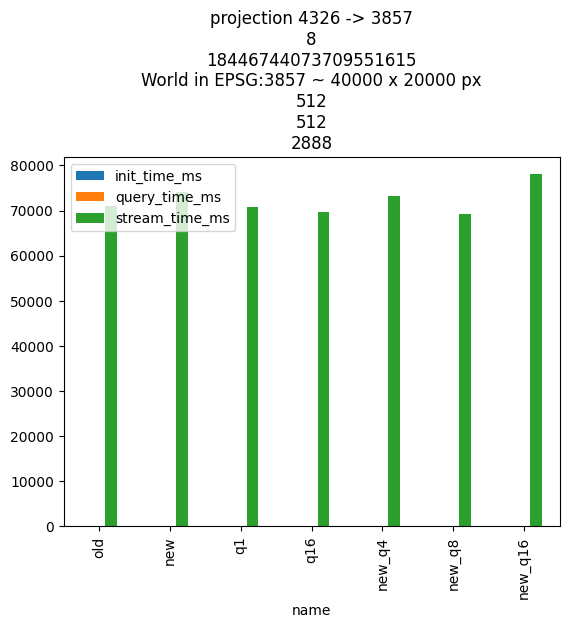

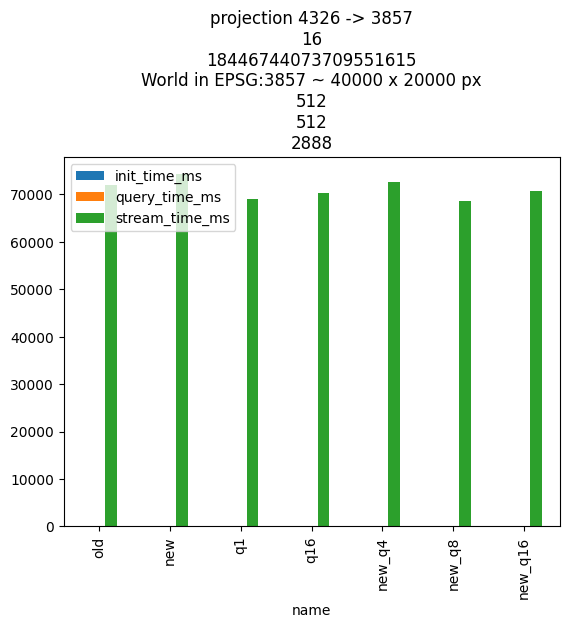

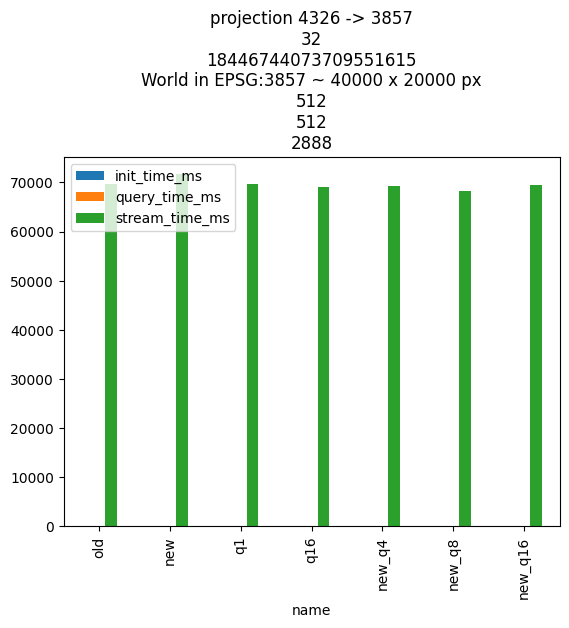

In [14]:
for name, group in df.groupby(['bench_id', 'num_threads', 'chunk_byte_size', 'qrect_name', 'tile_size_x', 'tile_size_y', 'number_of_tiles']):
    name = '\n'.join(map(str, name))
    group[['name', 'init_time_ms', 'query_time_ms', 'stream_time_ms']].plot.bar(x='name', title=name)
